<a href="https://colab.research.google.com/github/OMeghana/Data_Science_Projects/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Titanic_Classification**



In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns


In [4]:
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline

In [ ]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
training.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [ ]:
# seperate the data into numeric and categorical
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

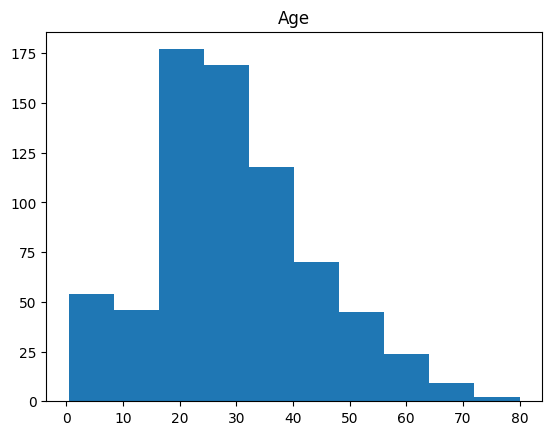

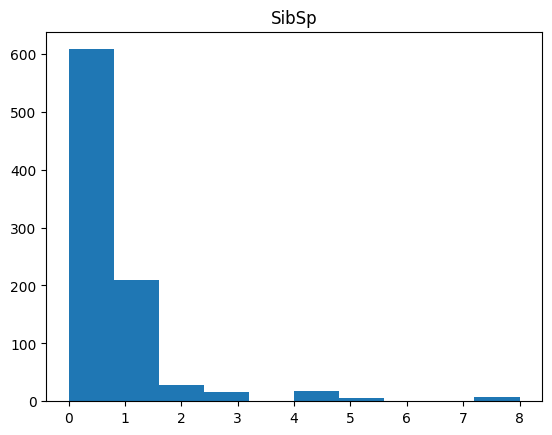

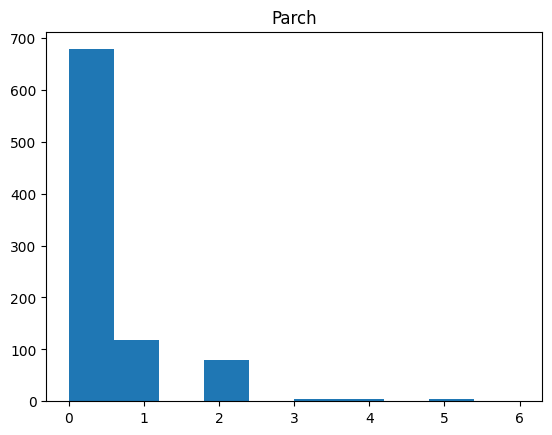

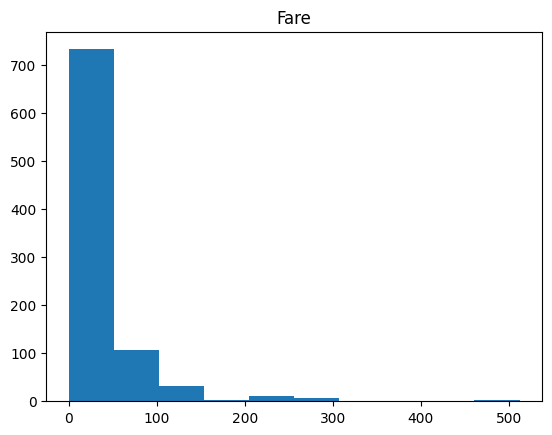

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


<Axes: >

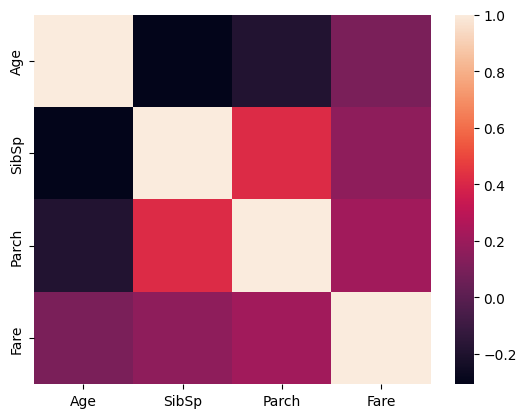

In [ ]:
sns.heatmap(df_num.corr())

In [ ]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


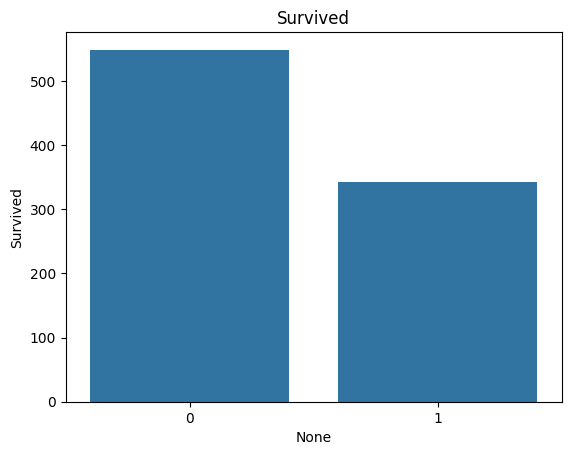

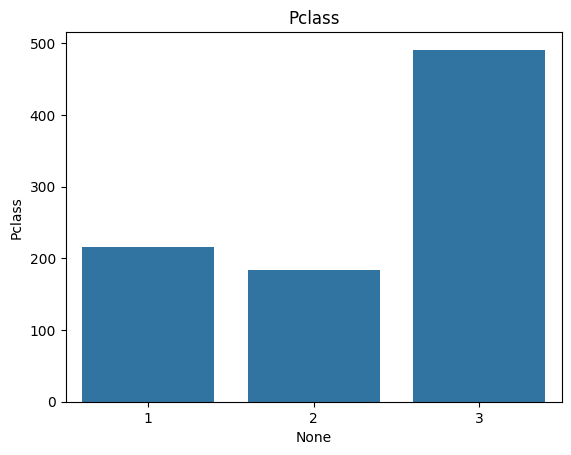

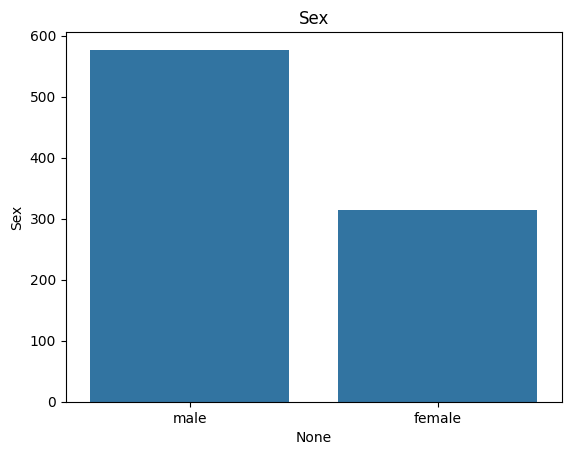

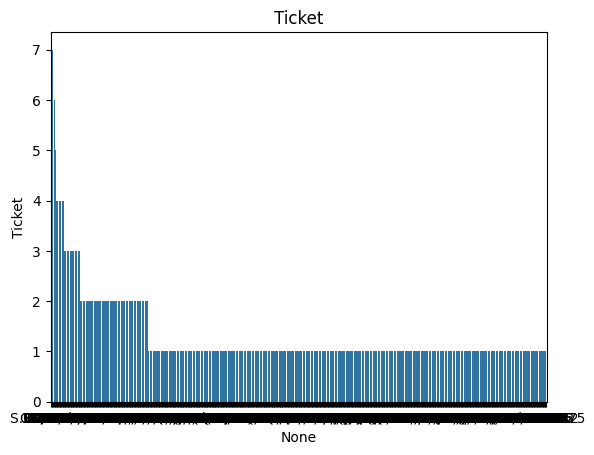

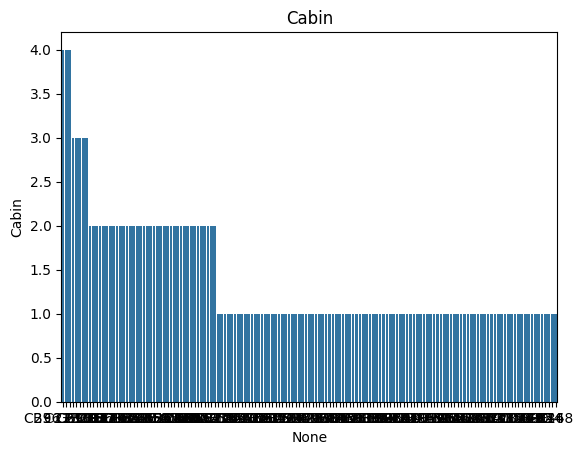

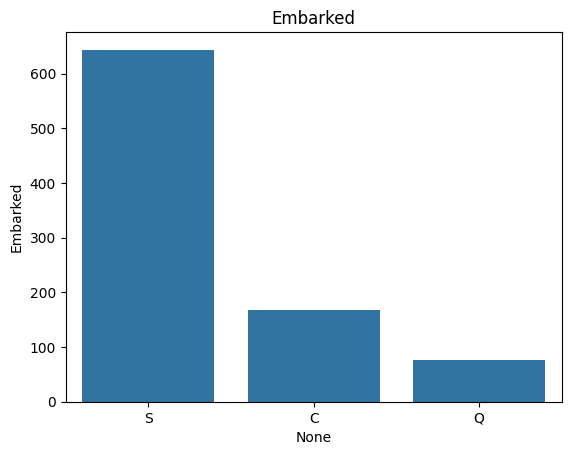

In [ ]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()


In [ ]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked',
                     values = 'Ticket' ,aggfunc ='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [ ]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x)
                                                    else len(x.split(' ')))
training['cabin_multiple'].value_counts()


0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [ ]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')


cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [ ]:
# n stands for null
# in this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv',
                        values = 'Name', aggfunc='count')


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [ ]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [ ]:
# Assuming you already have 'name_title' feature in your DataFrame

# Drop the 'Name' column as it's no longer needed
training.drop('Name', axis=1, inplace=True)

# Feature Engineering - Group rare titles into 'Rare'
training['name_title'] = training['name_title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Convert titles to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
training['name_title'] = training['name_title'].map(title_mapping)

# Handling Missing Values
# Assuming you have other features with missing values, you can impute them here
# For example, if 'Age' has missing values, you can impute them with the median
training['Age'].fillna(training['Age'].median(), inplace=True)

# Encoding Categorical Variables
# Assuming 'Sex' is a categorical variable, you can convert it to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
training['Sex'] = encoder.fit_transform(training['Sex'])

# If there are other categorical variables, you can handle them similarly

# Now, your data is ready for modeling


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Drop the null values from the Embarked column
training.dropna(subset=['Embarked'], inplace=True)

# Include only relevant data
relevant_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'ticket_letters', 'name_title']
training_relevant = training[relevant_columns].copy()  # Make a copy of the DataFrame

# Define categorical and numerical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'ticket_letters', 'name_title']
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Convert all categorical features to strings
training_relevant.loc[:, categorical_features] = training_relevant[categorical_features].astype(str)

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform data
X = training_relevant.drop('Survived', axis=1)
y = training_relevant['Survived']

# Fit_transform on the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Now X_preprocessed is your preprocessed feature matrix ready for modeling


In [ ]:
print(X_preprocessed)


  (0, 0)	-0.5636740664747023
  (0, 1)	0.4313502389523841
  (0, 2)	-0.4743258521037861
  (0, 3)	-0.5002397510893574
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 30)	1.0
  (0, 57)	1.0
  (1, 0)	0.6692169576775449
  (1, 1)	0.4313502389523841
  (1, 2)	-0.4743258521037861
  (1, 3)	0.788946607905507
  (1, 4)	1.0
  (1, 7)	1.0
  (1, 9)	1.0
  (1, 13)	1.0
  (1, 19)	1.0
  (1, 26)	1.0
  (1, 38)	1.0
  (1, 59)	1.0
  (2, 0)	-0.2554513104366405
  :	:
  (886, 58)	1.0
  (887, 0)	-0.2554513104366405
  (887, 1)	-0.4751990812099552
  (887, 2)	-0.4743258521037861
  (887, 3)	-0.0422126047899606
  (887, 4)	1.0
  (887, 8)	1.0
  (887, 9)	1.0
  (887, 13)	1.0
  (887, 19)	1.0
  (887, 27)	1.0
  (887, 28)	1.0
  (887, 57)	1.0
  (888, 0)	0.20688282362045216
  (888, 1)	-0.4751990812099552
  (888, 2)	-0.4743258521037861
  (888, 3)	-0.49017322040145855
  (888, 6)	1.0
  (888, 8)	1.0
  (888, 10)	1.0
  (888, 12)	1.0
  (888, 25)	1.0
  (888, 27)	1.0
  (888, 28)	1.0
  (888, 57)	1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#1) Logistic Regression
# Define logistic regression with maximum iterations set to 2000
lr = LogisticRegression(max_iter=2000)

# Perform cross-validation on the preprocessed data
cv = cross_val_score(lr, X_preprocessed, y, cv=5)
print(cv)
print(cv.mean())


[0.82022472 0.81460674 0.79775281 0.80898876 0.85875706]
0.8200660191709515


In [ ]:
# 2) K Nearest Neighbour
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_preprocessed,y,cv=5)
print(cv)
print(cv.mean())


[0.79775281 0.78651685 0.8258427  0.8258427  0.83615819]
0.8144226496540343


In [ ]:
# 3) Support Vector Classifier
svc = SVC(probability = True)
cv = cross_val_score(svc,X_preprocessed,y,cv=5)
print(cv)
print(cv.mean())


[0.84831461 0.82022472 0.8258427  0.80337079 0.8700565 ]
0.833561861232781
